In [4]:
import numpy as np
import pandas as pd
import pickle
import gzip

# from joblib import Parallel, delayed
# import multiprocessing
from methods.index_helpers import load_Kp
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime as datetime
import types
import scipy.io
import matplotlib.gridspec as gridspec

import bisect
from scipy import interpolate


from scipy import stats
from methods.xflib import xflib
import logging
import math
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

from mpl_toolkits.axes_grid1 import make_axes_locatable
xf = xflib(lib_path='/shared/users/asousa/WIPP/WIPP_stencils/python/methods/libxformd.so')
from scipy.integrate import nquad

from methods.GLD_file_tools import GLD_file_tools

from methods.precip_model import precip_model, build_database

# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

## Build stencil databases

In [6]:
# # --- build db ---
# suffix = 'AE8MAX_flux_0' # ae8max,
# suffix = 'AE8MAX_flux_1' # bell model
# suffix = 'AE8MAX_flux_2' # propensity
# suffix = 'AE8MIN_flux_0' # ae8minx
suffixes = ['AE8MAX_flux_0','AE8MAX_flux_1','AE8MAX_flux_2','AE8MIN_flux_0']
nb = 64
for suffix in suffixes:
    print "doing",suffix
    for side in ['nightside','dayside']:
        db = build_database(path='../outputs/stencils/%s/stencil_30f_0.2L/'%side,
                            n_bands = nb, avail_kp = [0,2,4,6,8], suffix=suffix)

        with open('../outputs/precip_dbs/%s_%s_%db.pkl'%(side, suffix, nb),'wb') as file:
            pickle.dump(db, file, protocol=pickle.HIGHEST_PROTOCOL)    
        
print "great success!"

doing AE8MAX_flux_0
building database from ../outputs/stencils/nightside/stencil_30f_0.2L/
['AE8MAX_flux_0' 'AE8MAX_flux_1' 'AE8MAX_flux_2' 'AE8MIN_flux_0']
['E_tot_arr', 'Lshells', 'tvec', 'Emin', 'Emax', 'n_JL', 'NUM_E', 'E_EXP_TOP', 'fluxfile', 'E_EXP_BOT', 'flux_dist', 'dt', 'v_tot_arr', 'alpha_dist', 'n_JE', 'DE_EXP']
band pairs:
[(0, 3), (3, 7), (7, 11), (11, 15), (15, 19), (19, 23), (23, 27), (27, 31), (31, 35), (35, 39), (39, 43), (43, 47), (47, 51), (51, 55), (55, 59), (59, 63), (63, 67), (67, 71), (71, 75), (75, 79), (79, 83), (83, 87), (87, 91), (91, 95), (95, 99), (99, 103), (103, 107), (107, 111), (111, 115), (115, 119), (119, 123), (123, 127), (127, 131), (131, 135), (135, 139), (139, 143), (143, 147), (147, 151), (151, 155), (155, 159), (159, 163), (163, 167), (167, 171), (171, 175), (175, 179), (179, 183), (183, 187), (187, 191), (191, 195), (195, 199), (199, 203), (203, 207), (207, 211), (211, 215), (215, 219), (219, 223), (223, 227), (227, 231), (231, 235), (235, 239)

## Precalculate stencils

In [33]:
# # --- Precalculate stencils ---

mode = 'energy'#counts'
logscale = False
# unique_kp = [0.,0.3,0.7, 1.,1.3, 1.7, 2.,2.3, 2.7, 3., 3.3, 3.7, 4., 4.3, 4.7,5.,5.3,5.7,6.,6.3,6.7,7.,7.3,7.7,8.]
# inlats = np.arange(15, 56, 1)

unique_kp = [0, 2, 4, 6, 8]
inlats = [15, 20, 25, 30, 35, 40, 45, 50, 54]

# suffix = 'AE8MIN_flux_0' # ae8min,
# suffix = 'AE8MAX_flux_0' # ae8max
# suffix = 'AE8MAX_flux_1' # Bell dist
suffix = 'AE8MAX_flux_2' # Propensity
nb = 64


stencil_lats = np.hstack([np.arange(-90, -20,0.5),(np.arange(19.5,90,0.5))])
stencil_lons = np.linspace(-14, 14, 57)
# print stencil_lats, stencil_lons

with open('../outputs/precip_dbs/nightside_%s_%db.pkl'%(suffix, nb),'rb') as file:
    db = pickle.load(file)
    
    p_night = precip_model(db, mode=mode)
    p_night.precalculate(unique_kp, inlats, stencil_lats, stencil_lons, logscale=logscale)

with open('../outputs/precip_dbs/dayside_%s_%db.pkl'%(suffix, nb),'rb') as file:
    db = pickle.load(file)
    
    p_day = precip_model(db, mode=mode)
    p_day.precalculate(unique_kp, inlats, stencil_lats, stencil_lons, logscale=logscale)

Q_NH Q_SH
7.21607087281e-11 -3.87183650394e-13
multi band interpolators
band 0
band 1
band 2
band 3
band 4
band 5
band 6
band 7
band 8
band 9
band 10
band 11
band 12
band 13
band 14
band 15
band 16
band 17
band 18
band 19
band 20
band 21
band 22
band 23
band 24
band 25
band 26
band 27
band 28
band 29
band 30
band 31
band 32
band 33
band 34
band 35
band 36
band 37
band 38
band 39
band 40
band 41
band 42
band 43
band 44
band 45
band 46
band 47
band 48
band 49
band 50
band 51
band 52
band 53
band 54
band 55
band 56
band 57
band 58
band 59
band 60
band 61
band 62
band 63
Q_NH Q_SH
9.67852515439e-12 -5.47878423639e-14
multi band interpolators
band 0
band 1
band 2
band 3
band 4
band 5
band 6
band 7
band 8
band 9
band 10
band 11
band 12
band 13
band 14
band 15
band 16
band 17
band 18
band 19
band 20
band 21
band 22
band 23
band 24
band 25
band 26
band 27
band 28
band 29
band 30
band 31
band 32
band 33
band 34
band 35
band 36
band 37
band 38
band 39
band 40
band 41
band 42
band 43
band 44
band

## Convert arrays to dictionaries

In [34]:
# This is a little bit of a band-aid. Move the precalculated stencils from an ndarray to a dictionary --
# key ~ [kp, inlat], data ~ [outlats, outlons]

precalc_stencils = dict()

for kp_ind, kp in enumerate(unique_kp):
    for inlat_ind, inlat in enumerate(inlats):

        key = (int(np.round(10.*kp)), inlat, 0)
        precalc_stencils[key] = p_night.precalculated['data'][kp_ind, inlat_ind, :,:].squeeze()
#         print np.shape(p_night.precalculated['data'])
#         print np.shape(precalc_stencils[key])


        key = (int(np.round(10.*kp)), inlat, 12)
        precalc_stencils[key] = p_day.precalculated['data'][kp_ind, inlat_ind, :,:].squeeze()

        
print len(precalc_stencils.keys())


90


In [ ]:
# save stencil dictionary:
# with open('../outputs/precip_dbs/precalculated_stencils_%s_%db.pkl'%(suffix, nb),'wb') as file:
#     pickle.dump(precalc_stencils, file, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with gzip.open('/shared/users/asousa/WIPP/WIPP_stencils/outputs/stencils/nightside/stencil_30f_0.2L/kp0/phi_inlat_15_AE8MAX_flux_0.pklz','rb') as file:
    data = pickle.load(file)

E = data['params']['E_tot_arr']

grid_E = []
for (p1, p2) in db['band_pairs']:
    grid_E.append((E[np.round((p1 + p2)/2)]))
#     print "fuck"

grid_E = np.array(grid_E)

## Plot precipitation for each stencil

0.5 0.5


<IPython.core.display.Javascript object>


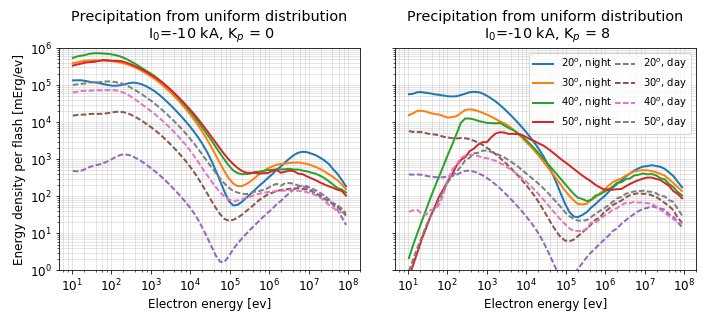

lat: 20, mlt 0, kp 0: pwr: 0.00 kJ
lat: 30, mlt 0, kp 0: pwr: 0.00 kJ
lat: 40, mlt 0, kp 0: pwr: 0.00 kJ
lat: 50, mlt 0, kp 0: pwr: 0.00 kJ
lat: 20, mlt 12, kp 0: pwr: 0.00 kJ
lat: 30, mlt 12, kp 0: pwr: 0.00 kJ
lat: 40, mlt 12, kp 0: pwr: 0.00 kJ
lat: 50, mlt 12, kp 0: pwr: 0.00 kJ
lat: 20, mlt 0, kp 8: pwr: 0.00 kJ
lat: 30, mlt 0, kp 8: pwr: 0.00 kJ
lat: 40, mlt 0, kp 8: pwr: 0.00 kJ
lat: 50, mlt 0, kp 8: pwr: 0.00 kJ
lat: 20, mlt 12, kp 8: pwr: 0.00 kJ
lat: 30, mlt 12, kp 8: pwr: 0.00 kJ
lat: 40, mlt 12, kp 8: pwr: 0.00 kJ
lat: 50, mlt 12, kp 8: pwr: 0.00 kJ


In [51]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 9 
fig_height = 3.5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------


# Plot total particles per energy band, per a single flash stencil:
# Area of each cell, in km: 
R_E = 6371. # Km
R_E = 6371e5 # cm
R2D = 180./np.pi
D2R = np.pi/180.
sec_in_year = 60*60*24*365.25
joule2millierg = 10*1e10


gridlats = stencil_lats
gridlons = stencil_lons

dlon = np.abs(gridlons[1] - gridlons[0])
dlat = np.abs(gridlats[1] - gridlats[0])
print dlon, dlat

# Cell areas, cm^2!  (whatever unit R_e is in)
cell_areas = np.abs((R_E*dlat*D2R)*(R_E*dlon*D2R)*np.cos((np.abs(gridlats) + np.abs(gridlats[1] - gridlats[0])/2.0)*D2R))

dE = [E[p[1]] - E[p[0]] for p in db['band_pairs']]

def tern(arg, a, b):
    ''' how the fuck does Python not have a native terniary operator '''
    if arg:
        return a
    else:
        return b

kps = [0,8]
mlts = [0, 12]
Io = -10e3

inlats = [20, 30, 40, 50] #[15, 25, 35, 45, 55]
# inlats = [15]


band = 0


fig, ax = plt.subplots(1,len(kps),sharex=True, sharey=True)
ax = np.atleast_1d(ax)
for k, kp in enumerate(kps):
    for mlt in mlts:
        for inlat in inlats:
            key = (int(10.*kp),inlat, mlt)

            # Stencils should be units of mErg/cm^2/ev (or #/cm^2/ev)
            d = precalc_stencils[key]*pow(Io/10000., 2)

            spec = np.sum(np.sum((d*cell_areas[:,np.newaxis, np.newaxis]),axis=0), axis=0)
            label = '%d$^o$, %s'%(inlat, tern(mlt==0,'night','day'))
            ax[k].loglog(grid_E, spec, label=label,linestyle=tern(mlt==0,'solid','dashed'), linewidth=2)

            
            if mode=='energy':
                pwr = np.sum(np.sum(np.sum((d*cell_areas[:,np.newaxis, np.newaxis]),axis=0), axis=0)*dE)
                print "lat: %d, mlt %d, kp %d: pwr: %2.2f kJ"%(inlat, mlt, kp, 1e-3*pwr/joule2millierg)
            else:
                tot = np.sum(np.sum(np.sum((d*cell_areas[:,np.newaxis, np.newaxis]),axis=0), axis=0)*dE)
                print "lat: %d, mlt %d, kp %d: counts: %2.2E el"%(inlat, mlt, kp, tot)




            

    ax[k].grid('on', which='both',alpha=0.4)
#     ax[0].set_ylabel('Energy density per flash [mErg/ev]')
    ax[k].set_xlabel('Electron energy [ev]')

#     minmax_str = tern('MAX' in suffix, 'maximum', 'minimum')
#     ax[k].set_title('%s conditions\n I$_0$=%d kA, K$_p$ = %d'%(minmax_str, Io*1e-3, kp))
#     minmax_str = tern('MAX' in suffix, 'maximum', 'minimum')
    ax[k].set_title('Precipitation from uniform distribution\n I$_0$=%d kA, K$_p$ = %d'%(Io*1e-3, kp))

    
    if mode=='energy':
#         ax[k].set_ylim([1e1, 1e13])
        ax[k].set_ylim([1e0, 1e6])
        ax[0].set_ylabel('Energy density per flash [mErg/ev]')
    else:
        ax[k].set_ylim([1e1, 1e20])
        ax[0].set_ylabel('electron density per flash [el/ev]')
ax[-1].legend(loc='upper right', ncol=2, columnspacing=0.3)
fig.tight_layout()
# ax.set_title('Precipitation from a uniform energy distribution\nIo = %d kA, nightside'%(Io*1e-3))
# fig.savefig('energy_spectrum_vs_input_lat_max_conditions_2up.png',dpi=150)
# # d = precalc_stencils[key][:,:,band]/np.max(precalc_stencils[key])
# ax.pcolormesh(stencil_lons, stencil_lats, np.log10(spec), vmin=-3, vmax=0)
fig.savefig('energy_spectrum_vs_input_lat_propensity_2up.png',dpi=150)




In [7]:
# Integrate to get total energy precipitated by a single flash:
joule2millierg = 10*1e10

print np.shape(d)
dE = [E[p[1]] - E[p[0]] for p in db['band_pairs']]

pwr = np.sum(np.sum(np.sum((d*cell_areas[:,np.newaxis, np.newaxis]),axis=0), axis=0)*dE)
print pwr/joule2millierg


(281, 57, 64)
273.296899091


In [ ]:
'hey %s'%tern(mlt==0,'nightside','dayside')

## Total energy precipitated (max conditions)
lat: 20, mlt 0, kp 0: pwr: 194.60 Joules
lat: 30, mlt 0, kp 0: pwr: 472.12 Joules
lat: 40, mlt 0, kp 0: pwr: 601.23 Joules
lat: 50, mlt 0, kp 0: pwr: 510.77 Joules
lat: 20, mlt 12, kp 0: pwr: 1.47 Joules
lat: 30, mlt 12, kp 0: pwr: 18.61 Joules
lat: 40, mlt 12, kp 0: pwr: 54.99 Joules
lat: 50, mlt 12, kp 0: pwr: 99.94 Joules

## Total energy precipitated (min conditions)
lat: 20, mlt 0, kp 0: pwr: 75.51 Joules
lat: 30, mlt 0, kp 0: pwr: 180.44 Joules
lat: 40, mlt 0, kp 0: pwr: 230.63 Joules
lat: 50, mlt 0, kp 0: pwr: 204.21 Joules
lat: 20, mlt 12, kp 0: pwr: 0.58 Joules
lat: 30, mlt 12, kp 0: pwr: 7.36 Joules
lat: 40, mlt 12, kp 0: pwr: 21.57 Joules
lat: 50, mlt 12, kp 0: pwr: 39.65 Joules

<IPython.core.display.Javascript object>


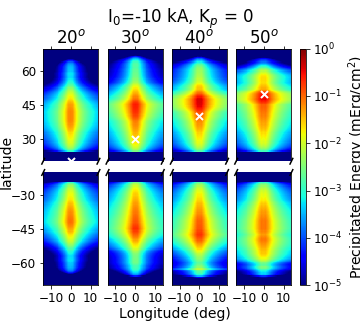

(1, 4, 2)
0 65
20
9730.0189365
30
23605.8144627
40
30061.7423685
50
25538.6495886


In [22]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 4
fig_height = 3.5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

# lats = [15, 20, 25, 30, 35, 40, 45, 50]
lats = [20, 30, 40, 50] #[15, 30, 45, 54]
# lats = inlats
kps = [0]#,4,6,8]
# Nightside plasmapause, kp 0, 4, 6, 8
Lpp = [7.98, 3.74, 2.89, 2.05]


fig = plt.figure()

widths = [1 for x in lats]
widths.append(0.1)

heights = []
# for k in range(len(kps)):
#     heights.append(0.05)
#     heights.append(0.15)
gs = gridspec.GridSpec(len(kps)*2,len(lats) + 1, width_ratios=widths)#, height_ratios=heights)
gs.update(wspace=0.2, hspace=0.1) # set the spacing between axes.
ax = []
for k in range(len(kps)):
    for x in range(len(lats)):
        ax.append(fig.add_subplot(gs[2*k,x]))
        ax.append(fig.add_subplot(gs[2*k + 1,x], sharex=ax[-1]))
cax = plt.subplot(gs[:,-1])
ax = np.array(ax).reshape(len(kps), len(lats), 2)
print np.shape(ax)
clims = [-5, 0]
p = []

Io = -10e3
mlt = 0

Emin = 1e1
Emax = 1e8
imin = bisect.bisect_left(grid_E, Emin)
imax = bisect.bisect_left(grid_E, Emax) + 1
print imin, imax

for k, kp in enumerate(kps):
    for x, lat in enumerate(lats):
        print lat
#         print k, x
        key = (int(10.*kp), lat, mlt)
        d = precalc_stencils[key][:,:,imin:imax]*pow(Io/10000., 2)
        
#         d = d*cell_areas[:,np.newaxis, np.newaxis]
        
#         print np.shape(d)
#         print np.shape(dE[imin:imax])
        d = d*(dE[imin:imax])
        stencil = np.sum(d,axis=-1)

        p = ax[k,x,0].pcolormesh(gridlons, gridlats, np.log10(stencil), 
                               vmin=clims[0], vmax=clims[1], cmap=plt.get_cmap('jet'))
        p = ax[k,x,1].pcolormesh(gridlons, gridlats, np.log10(stencil), 
                               vmin=clims[0], vmax=clims[1], cmap=plt.get_cmap('jet'))

        ax[k,x,0].plot(0,lat,'x',color='w', markersize=7, linewidth=3, markeredgewidth=2)
        print (np.sum(stencil*cell_areas[:,np.newaxis]))/joule2millierg

  
        
        # ---- this section to emulate the broken y-axis thing:
        ax[k,x,0].set_ylim([20,70])
        ax[k,x,1].set_ylim([-70,-20])
        
        ax[k,x,0].set_yticks([30,45,60])
        ax[k,x,1].set_yticks([-60,-45,-30])
        
        # hide the spines between ax and ax2
        ax[k,x,0].spines['bottom'].set_visible(False)
        ax[k,x,1].spines['top'].set_visible(False)
        ax[k,x,0].xaxis.tick_top()
        ax[k,x,0].tick_params(labeltop='off')  # don't put tick labels at the top
        ax[k,x,1].xaxis.tick_bottom()

        s = .025  # how big to make the diagonal lines in axes coordinates
        # arguments to pass to plot, just so we don't keep repeating them
        kwargs = dict(transform=ax[k,x,0].transAxes, color='k', clip_on=False)
        ax[k,x,0].plot((-s, +s), (-s, +s), **kwargs)        # top-left diagonal
        ax[k,x,0].plot((1 - s, 1 + s), (-s, +s), **kwargs)  # top-right diagonal

        kwargs.update(transform=ax[k,x,1].transAxes)  # switch to the bottom axes
        ax[k,x,1].plot((-s, +s), (1 - s, 1 + s), **kwargs)  # bottom-left diagonal
        ax[k,x,1].plot((1 - s, 1 + s), (1 - s, 1 + s), **kwargs)  # bottom-right diagonal
        # ----
            
#         ax[k,x,0].set_aspect('equal')
#         ax[k,x,1].set_aspect('equal')

        
    
cb = plt.colorbar(p, cax=cax)
cb.set_label('Precipitated Energy (mErg/cm$^2$)')
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)

# Clean up axis ticks
for k in range(len(kps)):
    for l in range(len(lats) - 1):
        ax[k,l+1,0].set_yticks([])
        ax[k,l+1,1].set_yticks([])
#     ax[k,0,0].set_ylabel('NH')
#     ax[k,0,1].set_ylabel('SH')
for k in range(len(kps) -1):
    for l in range(len(lats)):
        ax[k,l,0].set_xticks([])
        ax[k,l,1].set_xticks([])

for l, lat in enumerate(lats):
    ax[0,l,0].set_title('%d$^o$'%lat)

# gs.tight_layout(fig)


for k, kp in enumerate(kps):
#     fig.text(0, (len(kps)*1.0 - 1.0*k)/(len(kps) + 1),' Kp %d\nlatitude'%kp, rotation='vertical')
    fig.text(0, 0.55,'latitude', rotation='vertical')
#     fig.text((len(kps)*1.0 - 1.0*k)/(len(kps) + 2), 0.9, 'I$_0$=%d kA, K$_p$ = %d'%(Io*1e-3, kp))

fig.text(0.33,0.02,'Longitude (deg)')


# minmax_str = tern('MAX' in suffix, 'maximum', 'minimum')
fig.suptitle('I$_0$=%d kA, K$_p$ = %d'%(Io*1e-3, kp))
fig.subplots_adjust(left=0.12,right=0.85, bottom=0.12, top=0.85)

fig.savefig('energy_stencils_%s_kp%d.png'%(suffix, kp), dpi=150)


<IPython.core.display.Javascript object>


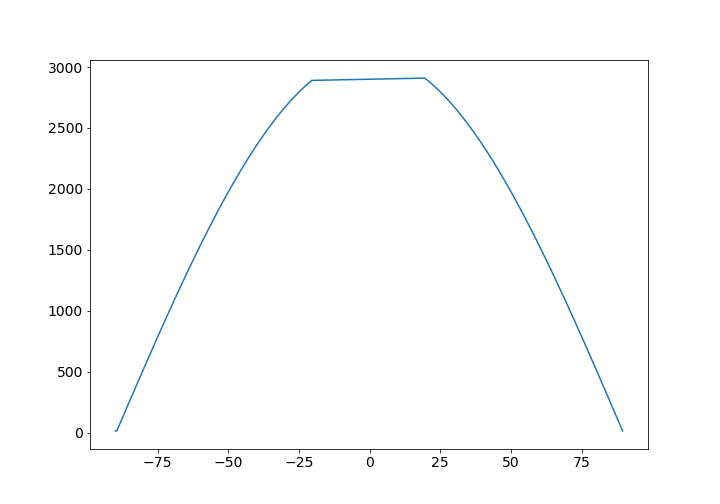

In [186]:
fig, ax = plt.subplots(1,1)
ax.plot(gridlats, cell_areas)

In [178]:
print stencil_lons, stencil_lats

[-14.  -13.5 -13.  -12.5 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5
  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5
  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5
   4.    4.5   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5
  10.   10.5  11.   11.5  12.   12.5  13.   13.5  14. ] [-90.  -89.5 -89.  -88.5 -88.  -87.5 -87.  -86.5 -86.  -85.5 -85.  -84.5
 -84.  -83.5 -83.  -82.5 -82.  -81.5 -81.  -80.5 -80.  -79.5 -79.  -78.5
 -78.  -77.5 -77.  -76.5 -76.  -75.5 -75.  -74.5 -74.  -73.5 -73.  -72.5
 -72.  -71.5 -71.  -70.5 -70.  -69.5 -69.  -68.5 -68.  -67.5 -67.  -66.5
 -66.  -65.5 -65.  -64.5 -64.  -63.5 -63.  -62.5 -62.  -61.5 -61.  -60.5
 -60.  -59.5 -59.  -58.5 -58.  -57.5 -57.  -56.5 -56.  -55.5 -55.  -54.5
 -54.  -53.5 -53.  -52.5 -52.  -51.5 -51.  -50.5 -50.  -49.5 -49.  -48.5
 -48.  -47.5 -47.  -46.5 -46.  -45.5 -45.  -44.5 -44.  -43.5 -43.  -42.5
 -42.  -41.5 -41.  -40.5 -40.  -39.5 -39.  -38.5 -38.  -37.5 -37.  -

In [284]:
print suffix

AE8MAX_flux_0
